MiniSom库是一种基于numpy自组织映射网络，下面是利用SOM来实现图片量化，合并不太重要的颜色，减少颜色数量

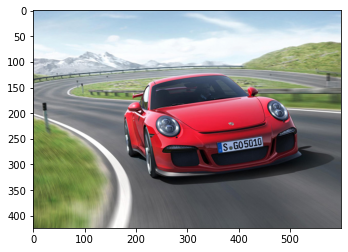

In [1]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread('img/porsche.jpg')
#img = plt.imread('img/zhu.jpg')
img = img/255
plt.imshow(img)

In [2]:
# 像素转换成矩阵
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3))

In [3]:
# SOM初始化
som = MiniSom(3,3,3,sigma=0.1,learning_rate=0.2)  # 3*3=9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()

som.train_random(pixels, 100)
qnt = som.quantization(pixels)
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):
    clustered[np.unravel_index(i,shape=(img.shape[0],img.shape[1]))] = q

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/minisom.py:486: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


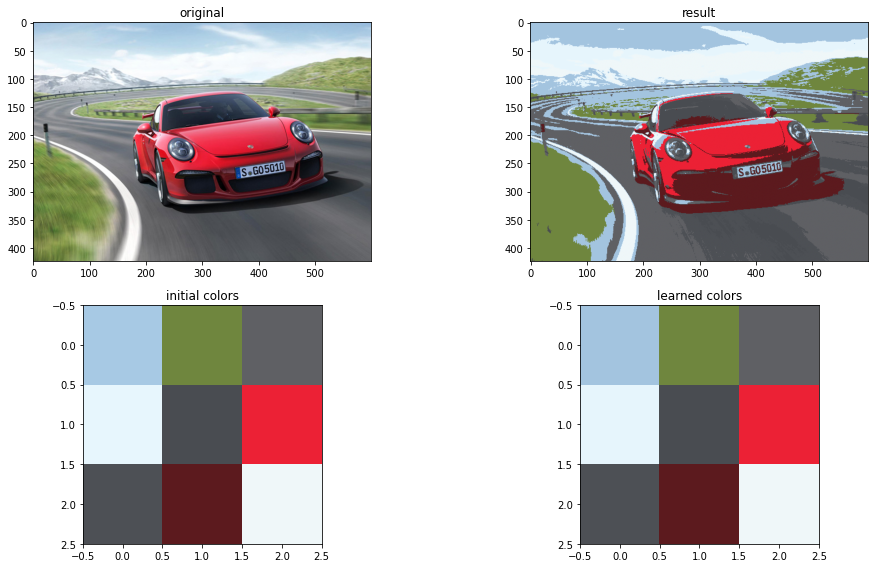

In [4]:
# 结果显示
plt.figure(figsize=(15, 8))
plt.subplot(221)
plt.title('original')
plt.imshow(img)

plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')

plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')
plt.tight_layout()
plt.show()